In [285]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# To answer RQ1, do some stat testing with test data

In [287]:
#import achievement result
achievement = pd.read_excel('AR_achievement2.xlsx') 
#drop all columns except user_id, pre_concept	pre_sptial	post_concept	post_sptial	pre_total	post_total
achievement = achievement[['id', 'pre_concept', 'pre_sptial', 'post_concept', 'post_sptial', 'pre_total', 'post_total', 'group']]
achievement

#students to drop: 6203, 6254, 6304, 6306, 6309 (did not complete the post test)
achievement = achievement[achievement.id != 6203]
achievement = achievement[achievement.id != 6254]
achievement = achievement[achievement.id != 6304]
achievement = achievement[achievement.id != 6306]
achievement = achievement[achievement.id != 6309]

achievement.reset_index(drop=True, inplace=True)
achievement

,id,pre_concept,pre_sptial,post_concept,post_sptial,pre_total,post_total,group
0,6201,57.50,30,68.75,30,87.50,98.75,markerless
1,6202,56.25,0,62.50,30,56.25,92.50,markerless
2,6204,47.50,30,51.25,30,77.50,81.25,markerless
3,6205,45.00,0,41.25,5,45.00,46.25,markerless
4,6206,68.75,15,70.00,20,83.75,90.00,markerless
5,6207,68.75,30,65.00,30,98.75,95.00,markerless
6,6208,65.00,30,70.00,30,95.00,100.00,markerless
7,6209,68.75,15,70.00,20,83.75,90.00,markerless
8,6251,60.00,15,70.00,30,75.00,100.00,markerless
9,6252,70.00,30,70.00,30,100.00,100.00,markerless


In [296]:
#t-test on pre_total and post_total on markerless group
t = stats.ttest_rel(achievement[achievement['group'] == 'markerless']['pre_total'], achievement[achievement['group'] == 'markerless']['post_total']) 

print('marker-less:', t)
#descriptive statistics on n, mean, sd
print('maker-less pre n: ', achievement[achievement['group'] == 'markerless']['pre_total'].count(), ' mean: ', achievement[achievement['group'] == 'markerless']['pre_total'].mean(), ' sd: ', achievement[achievement['group'] == 'markerless']['pre_total'].std())
print('maker-less post n: ', achievement[achievement['group'] == 'markerless']['post_total'].count(), ' mean: ', achievement[achievement['group'] == 'markerless']['post_total'].mean(), ' sd: ', achievement[achievement['group'] == 'markerless']['post_total'].std())

#t-test on pre_total and post_total on marker-based group
t = stats.ttest_rel(achievement[achievement['group'] == 'marker-based']['pre_total'], achievement[achievement['group'] == 'marker-based']['post_total'])
print('marker-based:', t)
#descriptive statistics on n, mean, sd
print('maker-based pre n: ', achievement[achievement['group'] == 'marker-based']['pre_total'].count(), ' mean: ', achievement[achievement['group'] == 'marker-based']['pre_total'].mean(), ' sd: ', achievement[achievement['group'] == 'marker-based']['pre_total'].std())
print('maker-based post n: ', achievement[achievement['group'] == 'marker-based']['post_total'].count(), ' mean: ', achievement[achievement['group'] == 'marker-based']['post_total'].mean(), ' sd: ', achievement[achievement['group'] == 'marker-based']['post_total'].std())

#run ANCOVA on post_total with pre_total as covariate
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
model = ols('post_total ~ pre_total + C(group)', data=achievement).fit()
anovaResults = anova_lm(model)
print(anovaResults)

#model summary
print(model.summary())
 


marker-less: TtestResult(statistic=-2.7992885066116595, pvalue=0.0118547834819952, df=18)
maker-less pre n:  19  mean:  78.09210526315789  sd:  24.559905577756282
maker-less post n:  19  mean:  87.10526315789474  sd:  24.30296560971316
marker-based: TtestResult(statistic=-2.681208863432946, pvalue=0.015247647906477717, df=18)
maker-based pre n:  19  mean:  85.52631578947368  sd:  18.86223717452599
maker-based post n:  19  mean:  90.92105263157895  sd:  12.595758940010475
             df       sum_sq      mean_sq          F        PR(>F)
C(group)    1.0   138.322368   138.322368   1.263134  2.687083e-01
pre_total   1.0  9654.416627  9654.416627  88.162336  4.292213e-11
Residual   35.0  3832.754425   109.507269        NaN           NaN
                            OLS Regression Results                            
Dep. Variable:             post_total   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.703
Method:            

# Now, move on to RQ2

## Below, need some works to preprocess the data

In [297]:
#load the raw data file
df = pd.read_csv('ar_ar.csv', low_memory=False)
df['date_trans'] = pd.to_datetime(df['date'].str.split('Z').str[0], format='%m-%d %H:%M:%S.%f')
df.drop(columns=['Unnamed: 0'], inplace=True)
df


,user_id,date,Cat1,Cat2,Cat3,date_trans,time_passed,Compass,Gyro,Gravity,Acceleration,Rotation,RotationRate,RotationRateUnbiased,class,Compass_Magnitude,Accelerometer_Magnitude,Angular_Velocity_Magnitude,Compass_Orientation,time_passed_sec
0,6201,07-17 03:57:49.223Z621,ZoomInOut_3D,NaN,NaN,1900-07-17 03:57:49.223,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0.000000,0.0,0.000000,NaN,0.0
1,6201,07-17 03:57:49.255Z621,ZoomInOut_3D,NaN,NaN,1900-07-17 03:57:49.255,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0.000000,0.0,0.000000,NaN,0.0
2,6201,07-17 03:57:49.290Z621,ZoomInOut_3D,NaN,NaN,1900-07-17 03:57:49.290,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0.000000,0.0,0.000000,NaN,0.0
3,6201,07-17 03:57:49.324Z621,ZoomInOut_3D,NaN,NaN,1900-07-17 03:57:49.324,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0.000000,0.0,0.000000,NaN,0.0
4,6201,07-17 03:57:49.357Z621,ZoomInOut_3D,NaN,NaN,1900-07-17 03:57:49.357,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0.000000,0.0,0.000000,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262751,6362,07-17 00:55:09.206Z6362,Device_Movement,"Compass: (-39.0, 21.8, 2.3) Gyro: (0.1, 0...",NaN,1900-07-17 00:55:09.206,43,"-39.0,21.8,2.3","(0.1, 0.0, 0.0)","(0.1, -1.0, -0.2)","0.1,-1.0,-0.2","(-0.4, 0.5, 0.7, -0.4)","0.1,0.0,0.0","(0.1, 0.0, 0.0)",3,1.542725,0.1,0.100000,NW,2635.0
262752,6362,07-17 00:55:09.368Z6362,Color,edge,NaN,1900-07-17 00:55:09.368,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0.000000,0.0,0.000000,NaN,2635.0
262753,6362,07-17 00:55:09.409Z6362,Device_Movement,"Compass: (-39.1, 21.7, 3.8) Gyro: (-0.1, ...",NaN,1900-07-17 00:55:09.409,43,"-39.1,21.7,3.8","(-0.1, 0.0, 0.0)","(0.1, -1.0, -0.2)","0.1,-1.0,-0.3","(-0.4, 0.5, 0.7, -0.4)","-0.1,0.0,0.0","(-0.1, 0.0, 0.0)",3,0.000000,0.0,0.000000,NW,2635.0
262754,6362,07-17 00:55:09.604Z6362,Device_Movement,"Compass: (-39.2, 21.8, 2.4) Gyro: (-0.2, ...",NaN,1900-07-17 00:55:09.604,43,"-39.2,21.8,2.4","(-0.2, -0.1, 0.0)","(0.1, -1.0, -0.2)","0.1,-1.0,-0.3","(-0.4, 0.5, 0.7, -0.4)","-0.2,-0.1,0.0","(-0.2, -0.1, 0.0)",3,1.407125,0.0,0.141421,NW,2635.0


## In We will focus on adding columns related to 
### 1) different time spent of learning activities (observation/creation), 2) time spent/order on different mode (3D/AR), 3) some frequencies data (how many problems they solved, how many figures they created, how many figures they observed)
### in order to do this, we need seperate functions below as 'pre-processing'. 
### We also divide a whole dataset into individual dataset for each student and then combine this again

In [298]:
# a function to set the entry point
#so, two entry points for learing: Figure_Selected_Explore (for observation) and Figure_Created_Create (creation)
#students can start with either of the two entry points and then move to the other or stay in the same entry point
def set_entry_point(targetDf):
    #from the dataset, we need to know how much time students spent on each entry point
    #we also need to know how sequential the students are in their learning path, which can be tracked by the ordering of the entry points
    targetDf['entry_point'] = np.nan
    targetDf.loc[targetDf['Cat1'] == 'Figure_Selected_Explore', 'entry_point'] = 'Observation'
    targetDf.loc[targetDf['Cat1'] == 'Figure_Created_Create', 'entry_point'] = 'Creation'
    
    #remove nan values prior to the first entry point
    first_entry_point_index = targetDf[targetDf['entry_point'].notna()].head(1).index
    targetDf = targetDf.loc[first_entry_point_index[0]:]
    return targetDf

# a function to calculate the time spent and order on each entry point
def set_order_timeSpent_on_entry_point(targetDf):
    targetDf['entry_point_order_total'] = '' #this should start from 1 and increase by 1 for each new entry point
    targetDf['entry_point_order_observation'] = '' #this should start from 1 and increase by 1 for each new observation
    targetDf['entry_point_order_creation'] = '' #this should start from 1 and increase by 1 for each new creation
    
    entry_total = 0
    entry_observation = 0
    entry_creation = 0
    for index, row in targetDf.iterrows():
        if row['entry_point'] == 'Observation':
            entry_observation += 1
            entry_total += 1
            targetDf.loc[index, 'entry_point_order_total'] = entry_total
            targetDf.loc[index, 'entry_point_order_observation'] = entry_observation
        if row['entry_point'] == 'Creation':
            entry_creation += 1
            entry_total += 1
            targetDf.loc[index, 'entry_point_order_total'] = entry_total
            targetDf.loc[index, 'entry_point_order_creation'] = entry_creation
    
    #now we have the entry point and the order of the entry point
    #using the entry point and the order of the entry point, we can calculate the time spent on each entry point by subtracting the time of the previous entry point.

    targetDf['entry_point_time_diff'] = 0
    targetDf['entry_point_time_diff'].astype('float64')
    
    #filter out the rows with entry point and calculate the time spent on each entry point
    temp_df = targetDf[targetDf['entry_point'].notna()]
    for i in range(0, temp_df.shape[0]):
        if i == temp_df.shape[0]-1:
            targetDf.loc[temp_df.index[i], 'entry_point_time_diff'] = (targetDf.loc[targetDf.shape[0]-1, 'date_trans'] - targetDf.loc[temp_df.index[i], 'date_trans']).seconds
        else:
            targetDf.loc[temp_df.index[i], 'entry_point_time_diff'] = (targetDf.loc[temp_df.index[i+1], 'date_trans'] - targetDf.loc[temp_df.index[i], 'date_trans']).seconds
    
    #remove values on entry_point_time_diff that are on rows with no empty entry_point
    targetDf['entry_point_time_diff'] = np.where(targetDf['entry_point'] == '', np.nan, targetDf['entry_point_time_diff'])
    
    #fill entry_point column so that this column has no empty values and can be used for further analysis
    targetDf['entry_point'] = targetDf['entry_point'].fillna(method='ffill') 
    
    #fill entry_point_order_total
    #replace '' with nan so that ffill can be used
    targetDf['entry_point_order_total'] = np.where(targetDf['entry_point_order_total'] == '', np.nan, targetDf['entry_point_order_total'])
    targetDf['entry_point_order_total'] = targetDf['entry_point_order_total'].fillna(method='ffill')
    targetDf['entry_point_order_total'] = targetDf['entry_point_order_total'].astype('int64')
    
    #fill entry_point_order_observation and entry_point_order_creation. These should be exclusive to each other, meaining that if one is filled, the other should be empty
    past_cursor = 'observation'
    for index, row in targetDf.iterrows():
        if index == 0:
            if row['entry_point_order_observation'] == '':
                past_cursor = 'creation'
            else:
                past_cursor = 'observation'
                
        else:
            if past_cursor == 'observation' and row['entry_point_order_creation'] != '':    #this means that the entry point is changed
                past_cursor = 'creation'
            elif past_cursor == 'creation' and row['entry_point_order_observation'] != '':    #this means that the entry point is changed
                past_cursor = 'observation'
            
            if past_cursor == 'observation':
                targetDf.loc[index, 'entry_point_order_observation'] = targetDf.loc[index, 'entry_point_order_total']
            else:
                targetDf.loc[index, 'entry_point_order_creation'] = targetDf.loc[index, 'entry_point_order_total']            
                 
    return targetDf


# a function to calculate the time spent on 3D, AR mode
# we should seperate 3D mode and AR mode activity, with time spent and the order of the activity
def set_mode(targetDf):
    targetDf['mode'] = np.nan 
    targetDf.loc[targetDf['Cat1'] == 'Mode_3D_Start', 'mode'] = '3D'
    targetDf.loc[targetDf['Cat1'] == 'Mode_Plane_AR_Start', 'mode'] = 'AR'
    targetDf.loc[targetDf['Cat1'] == 'Mode_Image_AR_Start', 'mode'] = 'AR'
    
    #note that this application starts with 3D mode. So, if the first mode shown in the current dataset is 3D, the first row of this dataset should be marked as 3D instead.
    #first check the first mode is 3D and then fill the first row with the mode value
    if targetDf.loc[targetDf['mode'].notna()].head(1)['mode'].values[0] == '3D':
        targetDf.loc[targetDf.loc[targetDf['mode'].notna()].head(1).index, 'mode'] = np.nan
        targetDf.loc[0, 'mode'] = '3D'  
    
    #now, we have the mode column with 3D and AR values
    return targetDf

# a function to calculate the time spent and order on each mode
def set_order_timeSpent_on_each_mode(targetDf):
    targetDf['mode_order_total'] = '' #this should start from 1 and increase by 1 for each new mode
    targetDf['mode_order_3D'] = '' #this should start from 1 and increase by 1 for each new 3D mode
    targetDf['mode_order_AR'] = '' #this should start from 1 and increase by 1 for each new AR mode
    
    mode_total = 0
    mode_3D = 0
    mode_AR = 0
    
    for index, row in targetDf.iterrows():
        if row['mode'] == '3D':
            mode_3D += 1
            mode_total += 1
            targetDf.loc[index, 'mode_order_total'] = mode_total
            targetDf.loc[index, 'mode_order_3D'] = mode_3D
        if row['mode'] == 'AR':
            mode_AR += 1
            mode_total += 1
            targetDf.loc[index, 'mode_order_total'] = mode_total
            targetDf.loc[index, 'mode_order_AR'] = mode_AR
            
    #now we have the mode and the order of the mode
    #using the mode and the order of the mode, we can calculate the time spent on each mode by subtracting the time of the previous mode.
    #we can use data_trans to calculate the time spent on each mode
    targetDf['mode_time_diff'] = 0
    targetDf['mode_time_diff'].astype('float64')
    
    temp_df = targetDf[targetDf['mode'].notna()]
    for i in range(0, temp_df.shape[0]):
        if i == temp_df.shape[0]-1:
            targetDf.loc[temp_df.index[i], 'mode_time_diff'] = (targetDf.loc[targetDf.shape[0]-1, 'date_trans'] - targetDf.loc[temp_df.index[i], 'date_trans']).seconds
        else:
            targetDf.loc[temp_df.index[i], 'mode_time_diff'] = (targetDf.loc[temp_df.index[i+1], 'date_trans'] - targetDf.loc[temp_df.index[i], 'date_trans']).seconds
            
    #okay. now ffill the mode column so that this column has no empty values and can be used for further analysis
    targetDf['mode'] = targetDf['mode'].fillna(method='ffill')
    return targetDf


# a function to set order of the problem solved
def set_order_of_problem_solved(targetDf):
    targetDf['problem_order'] = ''
    problem_order = 0
    for index, row in targetDf.iterrows():
        if row['Cat1'] == 'Problem_Solved':
            problem_order += 1
            targetDf.loc[index, 'problem_order'] = problem_order
    return targetDf

### Now, we have functions. Let's run these functions on each user_id and then combine these into one

In [299]:
pd.options.mode.chained_assignment = None

df_combined = pd.DataFrame()

for user_id in df['user_id'].unique():
    try:
        print(f"Processing user {user_id}")
        temp_df = df[df['user_id'] == user_id]
        temp_df['time_passed'] = temp_df['time_passed'].astype('int64') #in some cases, student did not close the app
        temp_df = temp_df[temp_df['time_passed'] <= 45].reset_index(drop=True)
        temp_df = set_entry_point(temp_df)
        temp_df = set_order_timeSpent_on_entry_point(temp_df)
        temp_df = set_mode(temp_df)
        temp_df = set_order_timeSpent_on_each_mode(temp_df)
        temp_df = set_order_of_problem_solved(temp_df)
        temp_df.dropna(subset=['user_id'], inplace=True)
        temp_df.reset_index(drop=True, inplace=True)
        temp_df.to_csv('ar_'+str(user_id)+'.csv') 
        df_combined = pd.concat([df_combined, temp_df])
        print(f"User {user_id} processed successfully")
    except Exception as e:
            print(f"IndexError for user_id {user_id}: {e}")
            

#because some rows are dropped during the process, we need to reset the index
df_combined.reset_index(drop=True, inplace=True)
df_combined['user_id'] = df_combined['user_id'].astype('int64')
#save the combined dataframe to a csv file
df_combined.to_csv('ar_combined.csv')

Processing user 6201
User 6201 processed successfully
Processing user 6202
User 6202 processed successfully
Processing user 6204
User 6204 processed successfully
Processing user 6205
User 6205 processed successfully
Processing user 6206
User 6206 processed successfully
Processing user 6207
User 6207 processed successfully
Processing user 6208
User 6208 processed successfully
Processing user 6209
User 6209 processed successfully
Processing user 6251
User 6251 processed successfully
Processing user 6252
User 6252 processed successfully
Processing user 6253
User 6253 processed successfully
Processing user 6255
User 6255 processed successfully
Processing user 6256
User 6256 processed successfully
Processing user 6257
User 6257 processed successfully
Processing user 6258
User 6258 processed successfully
Processing user 6259
User 6259 processed successfully
Processing user 6260
User 6260 processed successfully
Processing user 6261
User 6261 processed successfully
Processing user 6262
User 62

### Now the dataset is ready after pre-processing , and it is time to do some analysis

In [301]:
#first change the class name
df_combined = pd.read_csv('ar_combined.csv', low_memory=False)          #just reload
df_combined['class'] = df_combined['class'].astype('int64')
df_combined['class'] = df_combined['class'].astype('str')
#change class 2 to markerless and class 3 to marker-based
df_combined.loc[df_combined['class'] == '2', 'class'] = 'markerless'
df_combined.loc[df_combined['class'] == '3', 'class'] = 'marker-based'

### Make a seperate function to handle stat assumption check and run stat testing (t-test / Mann Whiteny U test)

In [303]:
import scipy.stats as stats
import numpy as np

def run_stat_testing(exp_group, ctrl_group):
    # Checking normality
    normality_exp = stats.shapiro(exp_group)
    normality_ctrl = stats.shapiro(ctrl_group)

    # Checking homogeneity of variance
    homogeneity = stats.levene(exp_group, ctrl_group)
    
    # print count of each group
    print('exp_group:', len(exp_group), 'ctrl_group:', len(ctrl_group))

    # Print the results
    print(
        f"Normality test for experimental group: Statistic={normality_exp[0]}, p-value={normality_exp[1]}")
    print(
        f"Normality test for control group: Statistic={normality_ctrl[0]}, p-value={normality_ctrl[1]}")
    print(
        f"Homogeneity of variance test: Statistic={homogeneity[0]}, p-value={homogeneity[1]}")

    # Assessing the results
    if normality_exp[1] > 0.05 and normality_ctrl[1] > 0.05 and homogeneity[1] > 0.05:
        print("Assumptions to run t-test are met.")
        #do t-test and return the result
        t_test_result = stats.ttest_ind(exp_group, ctrl_group)
        print(
            f"t-test: Statistic={t_test_result[0]}, p-value={t_test_result[1]}")
        #return t-statistic and p-value and df and effect size
        t_statistic = t_test_result[0]
        p_value = t_test_result[1]
        df = len(exp_group) + len(ctrl_group) - 2
        effect_size = t_statistic / np.sqrt(df)
        return round(t_statistic, 2), round(p_value, 4), df, round(effect_size, 4), 't-test'
        
    else:
        print("Assumptions to run t-test are not met.")
        #do non-parametric test and return the result using Mann-Whitney U test
        mann_whitney_result = stats.mannwhitneyu(exp_group, ctrl_group)
        
        #eta squared
        n1 = len(exp_group)
        n2 = len(ctrl_group)
        u = mann_whitney_result[0]
        eta_squared = u / (n1*n2)
        
        
        #Z score
        mu_U = n1*n2/2
        sigma_U = np.sqrt(n1*n2*(n1+n2+1)/12)
        z = (u - mu_U) / sigma_U
        
        #print all
        print(
            f"Mann-Whitney U test: Statistic={mann_whitney_result[0]}, p-value={mann_whitney_result[1]}, eta_squared={eta_squared}, z={z}")
        
        return u, round(mann_whitney_result[1], 4), round(eta_squared, 4), round(z, 4), 'Mann-Whitney U test'

## Part1: Device movement difference by group in terms of Angular_Velocity_Magnitude, Accelerometer_Magnitude


In [304]:
# Angular_Velocity_Magnitude, Accelerometer_Magnitude

#first check the min and max values of Angular_Velocity_Magnitude and Accelerometer_Magnitude
#markerless AR group
print('markerless AR group')
print(df_combined.loc[(df_combined['mode'] == 'AR') & (df_combined['class'] == 'markerless')][['Angular_Velocity_Magnitude', 'Accelerometer_Magnitude']].describe())

#marker-based AR group
print('marker-based AR group')
print(df_combined.loc[(df_combined['mode'] == 'AR') & (df_combined['class'] == 'marker-based')][['Angular_Velocity_Magnitude', 'Accelerometer_Magnitude']].describe())

# only show count, mean, std, min, max
stat_by_users = df_combined.loc[df_combined['mode'] == 'AR'].groupby(['user_id', 'class']).agg({'Angular_Velocity_Magnitude': ['mean', 'std'], 'Accelerometer_Magnitude': ['mean', 'std']})
# # stat_by_users   #this shows mean/sd by user_id
stat_by_users.groupby('class').describe().drop(columns=['25%', '50%', '75%'], level=2)


markerless AR group
       Angular_Velocity_Magnitude  Accelerometer_Magnitude
count               121418.000000            121418.000000
mean                     0.463220                 0.136484
std                      0.684449                 0.196458
min                      0.000000                 0.000000
25%                      0.000000                 0.000000
50%                      0.223607                 0.100000
75%                      0.616441                 0.173205
max                     14.906710                 7.590784
marker-based AR group
       Angular_Velocity_Magnitude  Accelerometer_Magnitude
count               121883.000000            121883.000000
mean                     0.242442                 0.081475
std                      0.492831                 0.150463
min                      0.000000                 0.000000
25%                      0.000000                 0.000000
50%                      0.000000                 0.000000
75%           

Angular_Velocity_Magnitude                                \
                                   mean                                 
                                  count      mean       std       min   
class                                                                   
marker-based                       19.0  0.277459  0.144114  0.090752   
markerless                         19.0  0.480645  0.106790  0.274646   

                                                                      \
                         std                                           
                   max count      mean       std       min       max   
class                                                                  
marker-based  0.592625  19.0  0.499265  0.178276  0.292534  0.845183   
markerless    0.712227  19.0  0.666281  0.142835  0.430096  1.091954   

             Accelerometer_Magnitude                                          \
                                mean                                           
                               count      mean       std       min       max   
class                                                                          
marker-based                    19.0  0.090593  0.039878  0.037224  0.171893   
markerless                      19.0  0.141223  0.028253  0.088543  0.199541   

                                                            
               std                                          
             count      mean       std       min       max  
class                                                       
marker-based  19.0  0.152788  0.044041  0.104934  0.247817  
markerless    19.0  0.191909  0.036606  0.128689  0.281520

In [305]:
stat_by_users
#do t-test on Angular_Velocity_Magnitude mean between markerless and marker-based group

#stat testing on Accelerometer_Magnitude
run_stat_testing(stat_by_users.loc[(slice(None), 'markerless'), 'Accelerometer_Magnitude']['mean'], stat_by_users.loc[(slice(None), 'marker-based'), 'Accelerometer_Magnitude']['mean'])

#stat testing on Angular_Velocity_Magnitude
run_stat_testing(stat_by_users.loc[(slice(None), 'markerless'), 'Angular_Velocity_Magnitude']['mean'], stat_by_users.loc[(slice(None), 'marker-based'), 'Angular_Velocity_Magnitude']['mean']) 

exp_group: 19 ctrl_group: 19
Normality test for experimental group: Statistic=0.9877944588661194, p-value=0.9948661923408508
Normality test for control group: Statistic=0.9203767776489258, p-value=0.11499831080436707
Homogeneity of variance test: Statistic=1.205206278027777, p-value=0.27957230507658665
Assumptions to run t-test are met.
t-test: Statistic=4.5157314155225565, p-value=6.52946209473958e-05
exp_group: 19 ctrl_group: 19
Normality test for experimental group: Statistic=0.9872207641601562, p-value=0.9933274984359741
Normality test for control group: Statistic=0.9161624312400818, p-value=0.09612290561199188
Homogeneity of variance test: Statistic=0.8262842968872505, p-value=0.3693948371449455
Assumptions to run t-test are met.
t-test: Statistic=4.9377162288280125, p-value=1.8171130890825836e-05


(4.94, 0.0, 36, 0.823, 't-test')

## Part2: time spent for observation and creation

In [307]:
#at least 10 seconds on each entry point to tell that the student is actually learning something either obsevation or creation
stat_by_users = df_combined.loc[df_combined['entry_point_time_diff'] >= 10]
stat_by_users = stat_by_users.groupby(['class', 'entry_point', 'user_id']).agg({'entry_point_time_diff': ['sum', 'std']})
 
stat_by_users
#note that users 6258, 6301 did not engage in creation 

entry_point_time_diff            
                                                   sum         std
class        entry_point user_id                                  
marker-based Creation    6302                    930.0   78.240015
                         6303                   2078.0  655.108388
                         6305                   1353.0  199.008291
                         6307                   2046.0  720.430196
                         6308                   2143.0  362.493264
...                                                ...         ...
markerless   Observation 6258                   1496.0  241.361140
                         6259                   1192.0  171.816181
                         6260                   2277.0  127.843282
                         6261                   1347.0  228.164414
                         6262                    780.0   26.870058

[74 rows x 2 columns]

In [308]:
#now get group mean and sd on each entry_point (creation, obsevation) by class
stat_by_users.groupby(['class', 'entry_point']).describe()

entry_point_time_diff                           \
                                           sum                            
                                         count         mean         std   
class        entry_point                                                  
marker-based Creation                     18.0  1854.222222  662.712834   
             Observation                  19.0   850.000000  779.898569   
markerless   Creation                     18.0  1018.111111  649.366016   
             Observation                  19.0  1580.842105  674.847741   

                                                                        \
                                                                   std   
                            min     25%     50%      75%     max count   
class        entry_point                                                 
marker-based Creation     114.0  1722.0  2062.0  2320.75  2495.0  18.0   
             Observation  169.0   271.5   507.0  1113.50  2691.0  13.0   
markerless   Creation     112.0   452.0   972.5  1641.25  1917.0  18.0   
             Observation  527.0  1039.5  1347.0  2215.50  2625.0  19.0   

                                                                         \
                                                                          
                                mean         std        min         25%   
class        entry_point                                                  
marker-based Creation     325.847896  206.165691  28.284271  165.599990   
             Observation  139.330792  115.319009  10.606602   75.660426   
markerless   Creation      88.074834   51.646667  26.562819   52.374536   
             Observation  167.911570  129.641515  26.083200   96.486107   

                                                              
                                                              
                                 50%         75%         max  
class        entry_point                                      
marker-based Creation     293.259300  435.226083  720.430196  
             Observation  106.589555  160.513239  395.450503  
markerless   Creation      66.711034  120.785983  189.837474  
             Observation  134.681989  217.713822  624.364944

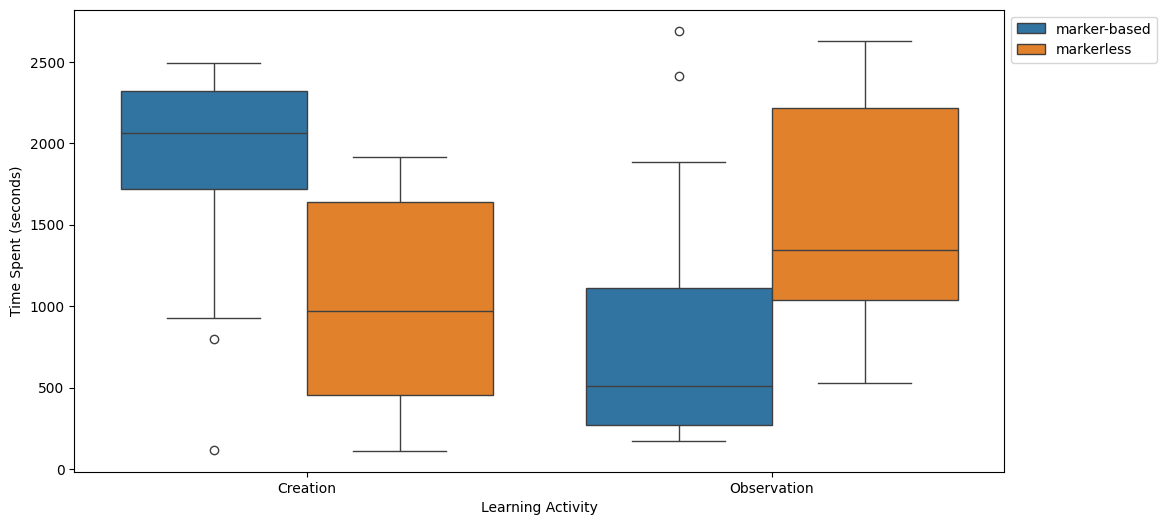

In [309]:
#now, focused on sum mean, draw boxplots to show the distribution of entry_point_time_diff on each entry point by class
#so, x axis is class, y axis is entry_point_time_diff, and hue is entry_point
plt.figure(figsize=(12, 6))
sns.boxplot(x='entry_point', y=('entry_point_time_diff', 'sum'), hue='class', data=stat_by_users)
plt.legend(title='AR Group')
#legend position outside the boxplot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
#y axis label
plt.ylabel('Time Spent (seconds)')
plt.xlabel('Learning Activity')
plt.show()


## Part 3: time spent on 3D or AR

In [310]:
#at least 10 seconds on each entry point to tell that the student is actually learning something either obsevation or manipulation/creation
stat_by_users = df_combined.loc[df_combined['mode_time_diff'] >= 10] 

stat_by_users = stat_by_users.groupby(['class', 'mode', 'user_id']).agg({'mode_time_diff': ['sum']})
#fill nan values with 0
stat_by_users.fillna(0, inplace=True)
 
stat_by_users
#note that users 6258, 6301 did not engage in creation 

#unstack the dataframe
# stat_by_users = stat_by_users.unstack(level=1)

# #drop
# stat_by_users.columns = stat_by_users.columns.droplevel(1) 
stat_by_users

mode_time_diff
                                     sum
class        mode user_id               
marker-based 3D   6301             793.0
                  6302             429.0
                  6303             671.0
                  6305            1751.0
                  6307             657.0
...                                  ...
markerless   AR   6258            1203.0
                  6259            1840.0
                  6260            1525.0
                  6261            1661.0
                  6262            2019.0

[76 rows x 1 columns]

In [311]:
#now get group mean and sd on each entry_point (creation, obsevation) by class
stat_by_users.groupby(['class', 'mode']).describe()

mode_time_diff                                          \
                             sum                                           
                           count         mean         std    min     25%   
class        mode                                                          
marker-based 3D             19.0   995.789474  420.523163  429.0   717.5   
             AR             19.0  1527.578947  452.144681  631.0  1271.5   
markerless   3D             19.0  1155.421053  539.941387  273.0   771.5   
             AR             19.0  1254.105263  586.254580  130.0   775.0   

                                           
                                           
                      50%     75%     max  
class        mode                          
marker-based 3D     942.0  1108.0  2096.0  
             AR    1645.0  1817.0  2204.0  
markerless   3D     922.0  1531.5  2137.0  
             AR    1256.0  1712.0  2158.0

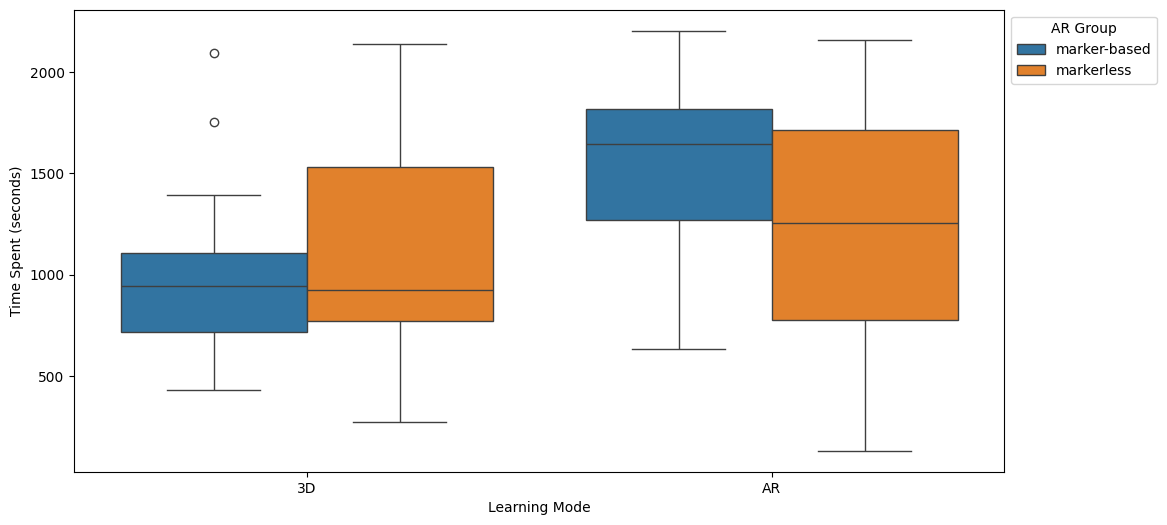

In [312]:
#now, focused on sum mean, draw boxplots to show the distribution of entry_point_time_diff on each entry point by class
#so, x axis is class, y axis is mode , and hue is entry_point
plt.figure(figsize=(12, 6))
sns.boxplot(x='mode', y=('mode_time_diff', 'sum'), hue='class', data=stat_by_users)
plt.legend(title='AR Group', loc='upper left', bbox_to_anchor=(1, 1))
#y axis label
plt.ylabel('Time Spent (seconds)')
plt.xlabel('Learning Mode')
plt.show()


### Make a mirror plot to incorporate learning mode (ar/3d) as well as learning activity (creation/observation) on each group

In [313]:
#x axis is Learning Mode (3D / AR)
#y axis is time spent, and it is a stacked bar with creation and observation
#hue is AR group

#so, we need four time spent values for each user_id: 3D_observation, 3D_creation, AR_observation, AR_creation
#mode_time_diff column is the time spent on each mode (3D, AR)

#first, we need to filter out the rows with mode_time_diff >= 10
stat_by_users = df_combined.loc[df_combined['mode_time_diff'] >= 10]
stat_by_users
#when entry_point is Observation, set the value of mode to 3D_observation or AR_observation
#when entry_point is Creation, set the value of mode to 3D_creation or AR_creation

stat_by_users['mode'] = np.where(stat_by_users['entry_point'] == 'Observation', 'Observation_'+stat_by_users['mode'], 'Creation_'+stat_by_users['mode'])
stat_by_users = stat_by_users.groupby(['class', 'mode', 'user_id']).agg({'mode_time_diff': ['sum']})
stat_by_users

#now, we need to unstack the mode column
stat_by_users = stat_by_users.unstack(level=1)
#replace nan values with 0
stat_by_users = stat_by_users.fillna(0)
stat_by_users

stat_by_users.columns = stat_by_users.columns.droplevel(0)
stat_by_users.columns = stat_by_users.columns.droplevel(0)
stat_by_users.reset_index(inplace=True)
stat_by_users

#group by class
stat_by_users = stat_by_users.groupby('class').agg({'Observation_3D': ['mean', 'std'], 'Observation_AR': ['mean', 'std'], 'Creation_3D': ['mean', 'std'], 'Creation_AR': ['mean', 'std']})
# stat_by_users.columns = stat_by_users.columns.droplevel(1)
stat_by_users.reset_index(inplace=True)
stat_by_users   


mode         class Observation_3D             Observation_AR              \
                             mean         std           mean         std   
0     marker-based     471.052632  265.418846     357.789474  628.276530   
1       markerless     787.789474  473.621225     799.315789  699.031954   

mode Creation_3D              Creation_AR              
            mean         std         mean         std  
0     524.736842  394.509659  1169.789474  716.747250  
1     367.631579  331.503010   454.789474  557.669813

In [314]:
stat_by_users = df_combined.loc[df_combined['mode_time_diff'] >= 10]
stat_by_users['mode'] = np.where(stat_by_users['entry_point'] == 'Observation', 'Observation_'+stat_by_users['mode'], 'Creation_'+stat_by_users['mode'])
stat_by_users = stat_by_users.groupby(['class', 'mode', 'user_id']).agg({'mode_time_diff': ['sum']})

#now, we need to unstack the mode column
stat_by_users = stat_by_users.unstack(level=1)
#replace nan values with 0
stat_by_users = stat_by_users.fillna(0)

stat_by_users.columns = stat_by_users.columns.droplevel(0)
stat_by_users.columns = stat_by_users.columns.droplevel(0)
stat_by_users.reset_index(inplace=True)

#group by class
stat_by_users = stat_by_users.groupby('class').agg({'Observation_3D': ['mean'], 'Observation_AR': ['mean'], 'Creation_3D': ['mean'], 'Creation_AR': ['mean']})
stat_by_users.columns = stat_by_users.columns.droplevel(1)
stat_by_users.reset_index(inplace=True)


#this should has columns: mode_type, markerless, marker-based
stat_by_users = stat_by_users.melt(id_vars=['class'], var_name='mode_type', value_name='time_spent')
stat_by_users = stat_by_users.pivot(index='mode_type', columns='class', values='time_spent')
stat_by_users.reset_index(inplace=True)
stat_by_users

class,mode_type,marker-based,markerless
0,Creation_3D,524.736842,367.631579
1,Creation_AR,1169.789474,454.789474
2,Observation_3D,471.052632,787.789474
3,Observation_AR,357.789474,799.315789


/var/folders/1t/p31bqdg15xj33jdt3vk89xb40000gn/T/ipykernel_37862/943179001.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([abs(int(label)) for label in labels])


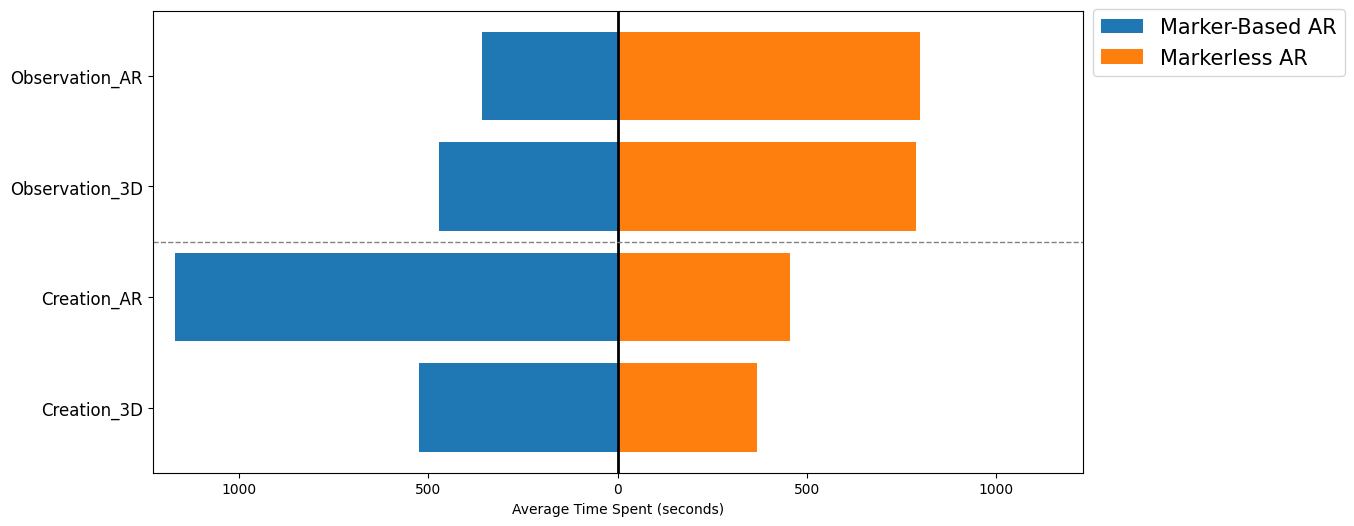

In [315]:
#draw mirror bar plot
fig, ax = plt.subplots(figsize=(12, 6))
y_pos = np.arange(len(stat_by_users['mode_type'])) 
bar_width = 0.8

ax.barh(y_pos, -stat_by_users['marker-based'], bar_width, align='center', label='Marker-Based AR')
ax.barh(y_pos, stat_by_users['markerless'], bar_width, align='center', label='Markerless AR')

# Adding labels and title
ax.set_xlabel('Average Time Spent (seconds)')
ax.set_yticks(y_pos)
ax.set_yticklabels(stat_by_users['mode_type'], fontsize=12)

# Adding vertical line at center
ax.axvline(x=0, color='black', linewidth=2)

# Adjusting the x-axis to ensure zero is at the center
max_value = stat_by_users[['marker-based', 'markerless']].values.max() * 1.05
ax.set_xlim(-max_value, max_value)

# Changing negative x-axis labels to positive
labels = ax.get_xticks().tolist()
ax.set_xticklabels([abs(int(label)) for label in labels])

# Displaying the legend
fig.legend(fontsize=15, loc='upper left', bbox_to_anchor=(0.9,0.9))
#anchor
# fig.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adding a dotted line separating 3D part and AR part
separation_index = 1.5  # This is between the second and third y-tick labels
ax.axhline(y=separation_index, color='grey', linestyle='--', linewidth=1)

# Display the plot 
plt.show()

## Part 4: Now, focus on how many figures students created figures, and how many problems solved on each mode (ar / 3d)
### Unlike observation, when students switch modes (ar<->3d), figures showing on the screeen during creation and problem solving were reset.

In [316]:
#nunqiue
stat_by_users = df_combined.groupby(['class', 'mode', 'user_id']).agg({'entry_point_order_creation': ['nunique'], 'problem_order': ['nunique']}) 

#unstack the mode column
stat_by_users = stat_by_users.unstack(level=1)
#replace nan values with 0
stat_by_users = stat_by_users.fillna(0)
# stat_by_users.columns = stat_by_users.columns.droplevel(0) 
#drop all columns and set the column names: class, user_id, 3D_creation, AR_creation, 3D_solving, AR_solving
stat_by_users.columns = stat_by_users.columns.droplevel(0)
stat_by_users.columns = stat_by_users.columns.droplevel(0)
stat_by_users.columns = ['3D_creation', 'AR_creation', '3D_solving', 'AR_solving']
stat_by_users['student_count'] = 0  #add student n count column 
stat_by_users.reset_index(inplace=True)
stat_by_users

#run stat testing on 3D_creation, AR_creation, 3D_solving, AR_solving
#3D_creation
print('3D_creation stat testing')
run_stat_testing(stat_by_users[stat_by_users['class']=='markerless']['3D_creation'], stat_by_users[stat_by_users['class']=='marker-based']['3D_creation'])
#AR_creation
print('AR_creation stat testing')
run_stat_testing(stat_by_users[stat_by_users['class']=='markerless']['AR_creation'], stat_by_users[stat_by_users['class']=='marker-based']['AR_creation'])
#3D_solving
print('3D_solving stat testing')
run_stat_testing(stat_by_users[stat_by_users['class']=='markerless']['3D_solving'], stat_by_users[stat_by_users['class']=='marker-based']['3D_solving'])
#AR_solving
print('AR_solving stat testing')
run_stat_testing(stat_by_users[stat_by_users['class']=='markerless']['AR_solving'], stat_by_users[stat_by_users['class']=='marker-based']['AR_solving'])


#group by class to report on a table
stat_by_users = stat_by_users.groupby('class').agg({'3D_creation': ['mean', 'median', 'std'], 'AR_creation': ['mean', 'median', 'std'], '3D_solving': ['mean', 'median', 'std'], 'AR_solving': ['mean', 'median', 'std'], 'student_count': ['count']})

stat_by_users

3D_creation stat testing
exp_group: 19 ctrl_group: 19
Normality test for experimental group: Statistic=0.9418348670005798, p-value=0.28447094559669495
Normality test for control group: Statistic=0.9196802377700806, p-value=0.1116381585597992
Homogeneity of variance test: Statistic=0.8481308411214954, p-value=0.3632122577099842
Assumptions to run t-test are met.
t-test: Statistic=0.05920027784728906, p-value=0.9531199995638946
AR_creation stat testing
exp_group: 19 ctrl_group: 19
Normality test for experimental group: Statistic=0.6868265867233276, p-value=3.889363506459631e-05
Normality test for control group: Statistic=0.9036832451820374, p-value=0.05674644932150841
Homogeneity of variance test: Statistic=2.6907343857240895, p-value=0.10964344191946307
Assumptions to run t-test are not met.
Mann-Whitney U test: Statistic=244.5, p-value=0.06102165293113574, eta_squared=0.6772853185595568, z=1.8684638188639295
3D_solving stat testing
exp_group: 19 ctrl_group: 19
Normality test for experi

3D_creation                  AR_creation                   \
                    mean median       std        mean median       std   
class                                                                    
marker-based    5.105263    5.0  2.378018    4.105263    3.0  2.922988   
markerless      5.157895    5.0  3.059832    8.631579    5.0  9.906286   

             3D_solving                  AR_solving                    \
                   mean median       std       mean median        std   
class                                                                   
marker-based   2.631579    1.0  3.744782  18.684211    8.0  22.752418   
markerless     3.473684    2.0  3.595807   1.315789    1.0   1.376494   

             student_count  
                     count  
class                       
marker-based            19  
markerless              19

## Part 5: Now, focus on how many figures students observed on each mode (3d /ar)
### note that the figures remains whether students switch modes

In [317]:
stat_by_users = df_combined[df_combined['entry_point']=='Observation']
stat_by_users = df_combined[df_combined['mode_time_diff'] >= 10]    #to ensure that the student is actually learning something (more than 10 seconds)
stat_by_users = stat_by_users.groupby(['class', 'user_id', 'entry_point_order_observation']).agg({'mode_order_3D': ['count'], 'mode_order_AR': ['count']})
stat_by_users.columns = stat_by_users.columns.droplevel(0) 

stat_by_users.columns = ['3D_observation','AR_observation']
stat_by_users.reset_index(inplace=True)

# # get sum of columns 3D_observation and AR_observation by class
stat_by_users = stat_by_users.groupby(['class', 'user_id']).agg({'3D_observation': ['sum'], 'AR_observation': ['sum']})
stat_by_users.columns = stat_by_users.columns.droplevel(1)

#combine two levels of columns
stat_by_users.columns = ['3D_observation', 'AR_observation']
stat_by_users.reset_index(inplace=True)
#run stat testing on 3D_observation and AR_observation
print('3D_observation stat testing')
run_stat_testing(stat_by_users[stat_by_users['class']=='markerless']['3D_observation'], stat_by_users[stat_by_users['class']=='marker-based']['3D_observation'])
print('AR_observation stat testing')
run_stat_testing(stat_by_users[stat_by_users['class']=='markerless']['AR_observation'], stat_by_users[stat_by_users['class']=='marker-based']['AR_observation'])


#below is for reporint on a table
stat_by_users = stat_by_users.groupby('class').agg({'3D_observation': ['mean', 'median', 'std'], 'AR_observation': ['mean', 'median', 'std']})
stat_by_users



3D_observation stat testing
exp_group: 19 ctrl_group: 18
Normality test for experimental group: Statistic=0.7524933815002441, p-value=0.00025216859648935497
Normality test for control group: Statistic=0.7408262491226196, p-value=0.0002482214476913214
Homogeneity of variance test: Statistic=1.1108356062484495, p-value=0.29912223750344025
Assumptions to run t-test are not met.
Mann-Whitney U test: Statistic=277.5, p-value=0.0011531300746205934, eta_squared=0.8114035087719298, z=3.236200193089218
AR_observation stat testing
exp_group: 19 ctrl_group: 18
Normality test for experimental group: Statistic=0.7859392166137695, p-value=0.0007192027987912297
Normality test for control group: Statistic=0.6352722644805908, p-value=1.5464132957276888e-05
Homogeneity of variance test: Statistic=3.1385078419213834, p-value=0.08517107742033933
Assumptions to run t-test are not met.
Mann-Whitney U test: Statistic=274.5, p-value=0.0012160012644797692, eta_squared=0.8026315789473685, z=3.1450396242698035


3D_observation                  AR_observation                 
                       mean median       std           mean median       std
class                                                                       
marker-based       3.222222    2.0  2.755861       1.333333    0.0  2.376354
markerless         6.421053    5.0  4.537691       3.789474    3.0  3.473374